In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 20

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="Z5EX5iVLKODVqQUtvWQs")
project = rf.workspace("fyp-fksbh").project("fyp-sugarcane-plant-disease")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to fyp-Sugarcane-Plant-Disease-2 in yolov8:: 100%|██████████| 18986/18986 [00:03<00:00, 6154.99it/s] 


In [4]:
import os
import imgaug.augmenters as iaa
from PIL import Image
import numpy as np

In [5]:
print(f"Dataset downloaded and saved to {dataset.location}")

Dataset downloaded and saved to /kaggle/working/fyp-Sugarcane-Plant-Disease-2


In [6]:
import yaml
with open('/kaggle/working/fyp-Sugarcane-Plant-Disease-2/data.yaml','r') as f:
    data = yaml.safe_load(f)
data

{'names': ['Apple Scab Leaf',
  'Apple leaf',
  'Apple rust leaf',
  'Bell_pepper leaf',
  'Bell_pepper leaf spot',
  'Blueberry leaf',
  'Cherry leaf',
  'Corn Gray leaf spot',
  'Corn leaf blight',
  'Corn rust leaf',
  'Peach leaf',
  'Potato leaf',
  'Potato leaf early blight',
  'Potato leaf late blight',
  'Raspberry leaf',
  'Soyabean leaf',
  'Soybean leaf',
  'Squash Powdery mildew leaf',
  'Strawberry leaf',
  'Tomato Early blight leaf',
  'Tomato Septoria leaf spot',
  'Tomato leaf',
  'Tomato leaf bacterial spot',
  'Tomato leaf late blight',
  'Tomato leaf mosaic virus',
  'Tomato leaf yellow virus',
  'Tomato mold leaf',
  'Tomato two spotted spider mites leaf',
  'cercospora',
  'eyespot',
  'grape leaf',
  'grape leaf black rot',
  'healthy',
  'redrot',
  'wheat rust',
  'yellow leaf'],
 'nc': 36,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'fyp-sugarcane-plant-disease',
  'url': 'https://universe.roboflow.com/fyp-fksbh/fyp-sugarcane-plant-disease/dataset/2',
  

In [7]:
data = {
    'names':
['Apple Scab Leaf',
 'Apple leaf',
 'Apple rust leaf',
 'Bell_pepper leaf',
 'Bell_pepper leaf spot',
 'Blueberry leaf',
 'Cherry leaf',
 'Corn Gray leaf spot',
 'Corn leaf blight',
 'Corn rust leaf',
 'Peach leaf',
 'Potato leaf',
 'Potato leaf early blight',
 'Potato leaf late blight',
 'Raspberry leaf',
 'Soyabean leaf',
 'Soybean leaf',
 'Squash Powdery mildew leaf',
 'Strawberry leaf',
 'Tomato Early blight leaf',
 'Tomato Septoria leaf spot',
 'Tomato leaf',
 'Tomato leaf bacterial spot',
 'Tomato leaf late blight',
 'Tomato leaf mosaic virus',
 'Tomato leaf yellow virus',
 'Tomato mold leaf',
 'Tomato two spotted spider mites leaf',
 'cercospora',
 'eyespot',
 'grape leaf',
 'grape leaf black rot',
 'healthy',
 'redrot',
 'wheat rust',
 'yellow leaf'],
'nc': 36,
'roboflow':
 {'license': 'CC BY 4.0',
  'project': 'fyp-sugarcane-plant-disease',
  'url': 'https://universe.roboflow.com/fyp-fksbh/fyp-sugarcane-plant-disease/dataset/2',
  'version': 2,
  'workspace': 'fyp-fksbh'},
'test': '../test/images',
'train': '../train/images',
'val': '../valid/images',
}

In [8]:
with open('/kaggle/working/fyp-Sugarcane-Plant-Disease-2/data.yaml','w') as f:
    yaml.dump(data, f)
data

{'names': ['Apple Scab Leaf',
  'Apple leaf',
  'Apple rust leaf',
  'Bell_pepper leaf',
  'Bell_pepper leaf spot',
  'Blueberry leaf',
  'Cherry leaf',
  'Corn Gray leaf spot',
  'Corn leaf blight',
  'Corn rust leaf',
  'Peach leaf',
  'Potato leaf',
  'Potato leaf early blight',
  'Potato leaf late blight',
  'Raspberry leaf',
  'Soyabean leaf',
  'Soybean leaf',
  'Squash Powdery mildew leaf',
  'Strawberry leaf',
  'Tomato Early blight leaf',
  'Tomato Septoria leaf spot',
  'Tomato leaf',
  'Tomato leaf bacterial spot',
  'Tomato leaf late blight',
  'Tomato leaf mosaic virus',
  'Tomato leaf yellow virus',
  'Tomato mold leaf',
  'Tomato two spotted spider mites leaf',
  'cercospora',
  'eyespot',
  'grape leaf',
  'grape leaf black rot',
  'healthy',
  'redrot',
  'wheat rust',
  'yellow leaf'],
 'nc': 36,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'fyp-sugarcane-plant-disease',
  'url': 'https://universe.roboflow.com/fyp-fksbh/fyp-sugarcane-plant-disease/dataset/2',
  

In [9]:
img_path = os.listdir('/kaggle/working/fyp-Sugarcane-Plant-Disease-2/train/images')[1]
label_path = os.listdir('/kaggle/working/fyp-Sugarcane-Plant-Disease-2/train/labels')[1]

In [10]:
data_size = {}
k = 0
base = '/kaggle/working/fyp-Sugarcane-Plant-Disease-2/train/labels'
for file in os.listdir(base):
    path = os.path.join(base, file)
    with open(path, 'r') as f:
        for line in f.readlines():
            class_value = line.split(' ')[0]
            try:
                data_size[class_value] = data_size[class_value] + 1
            except:
                data_size[class_value] = 0

In [11]:
data_size

{'13': 593,
 '28': 569,
 '34': 833,
 '23': 512,
 '18': 1022,
 '29': 827,
 '10': 1448,
 '3': 728,
 '35': 719,
 '2': 329,
 '1': 506,
 '19': 431,
 '0': 389,
 '17': 527,
 '22': 614,
 '32': 1667,
 '33': 704,
 '8': 695,
 '15': 629,
 '6': 455,
 '4': 497,
 '25': 1664,
 '5': 1484,
 '20': 893,
 '30': 431,
 '12': 761,
 '21': 794,
 '24': 485,
 '14': 1274,
 '9': 281,
 '7': 125,
 '31': 251,
 '26': 713,
 '27': 5,
 '11': 8,
 '16': 44}

In [12]:
small_classes = [cls for cls in data_size.keys() if data_size[cls] < 300]
small_classes

['9', '7', '31', '27', '11', '16']

#### Preprocessing

- data augmentation

In [13]:
# Define augmentation sequence
augmenter = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontal flips
    iaa.Flipud(0.5),  # vertical flips
    iaa.Rotate((-45, 45)),  # random rotations
    iaa.GaussianBlur(sigma=(0, 3.0)),  # blur images
    iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255)),  # add Gaussian noise
    iaa.Multiply((0.5, 1.5), per_channel=0.5),  # brightness change
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},  # scale images
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},  # translate images
        rotate=(-25, 25),  # rotate images
        shear=(-8, 8)  # shear images
    )
])

In [14]:
# Paths to your dataset folders
train_images_path = "/kaggle/working/fyp-Sugarcane-Plant-Disease-2/train/images/"
train_labels_path = "/kaggle/working/fyp-Sugarcane-Plant-Disease-2/train/labels/"
valid_images_path = "/kaggle/working/fyp-Sugarcane-Plant-Disease-2/valid/images/"
valid_labels_path = "/kaggle/working/fyp-Sugarcane-Plant-Disease-2/valid/labels/"

In [15]:
# Augment and save images
def augment_and_save(images_path, labels_path, output_images_path, output_labels_path, num_augmentations_per_image=2):
    image_files = os.listdir(images_path)
    for image_file in image_files:
        # Load image
        image = Image.open(os.path.join(images_path, image_file))
        image = np.array(image)

        # Load corresponding label file
        with open(os.path.join(labels_path, os.path.splitext(image_file)[0] + '.txt'), 'r') as label_file:
            lines = label_file.readlines()
            bounding_boxes = []
            for line in lines: 
                bounding = []
                if line.strip().split()[0] in small_classes:
                    bounding.append(int(line.strip().split()[0])) # append class label
                    bounding.extend(map(float,line.strip().split()[1:])) # append bounding box
                    bounding_boxes.append(bounding)
        
        if len(bounding_boxes) == 0:
            continue
        
        # Apply augmentation multiple times
        for i in range(num_augmentations_per_image):
            augmented_image = augmenter(image=image)

            # Save augmented image
            augmented_image_filename = os.path.splitext(image_file)[0][:10] + f"_aug{i}.jpg"
            Image.fromarray(augmented_image).save(os.path.join(output_images_path, augmented_image_filename))

            # Save augmented label file
            augmented_label_filename = os.path.splitext(image_file)[0][:10] + f"_aug{i}.txt"
            with open(os.path.join(output_labels_path, augmented_label_filename), 'w') as augmented_label_file:
                for bbox in bounding_boxes:
                    augmented_label_file.write(' '.join(map(str, bbox)) + '\n')

In [16]:
# Augment training images
augment_and_save(train_images_path, train_labels_path, train_images_path, train_labels_path, num_augmentations_per_image=5)

In [17]:
# Augment validation images
augment_and_save(valid_images_path, valid_labels_path, valid_images_path, valid_labels_path, num_augmentations_per_image=5)

In [20]:
data_size_aug = {}
k = 0
base = '/kaggle/working/fyp-Sugarcane-Plant-Disease-2/train/labels'
for file in os.listdir(base):
    path = os.path.join(base, file)
    with open(path, 'r') as f:
        for line in f.readlines():
            class_value = line.split(' ')[0]
            try:
                data_size_aug[class_value] = data_size_aug[class_value] + 1
            except:
                data_size_aug[class_value] = 0

In [21]:
data_size_aug

{'13': 593,
 '28': 569,
 '34': 833,
 '23': 512,
 '18': 1022,
 '29': 827,
 '10': 1448,
 '3': 728,
 '35': 719,
 '2': 329,
 '1': 506,
 '9': 646,
 '19': 431,
 '0': 389,
 '17': 527,
 '22': 614,
 '32': 1667,
 '33': 704,
 '8': 695,
 '15': 629,
 '6': 455,
 '31': 606,
 '4': 497,
 '25': 1664,
 '5': 1484,
 '7': 285,
 '20': 893,
 '30': 431,
 '12': 761,
 '21': 794,
 '24': 485,
 '14': 1274,
 '26': 713,
 '27': 15,
 '11': 23,
 '16': 119}

# **YOLOV8**

['28 0.27890625 0.34609375 0.5578125 0.16484375\n', '28 0.45859375 0.64765625 0.746875 0.12265625']


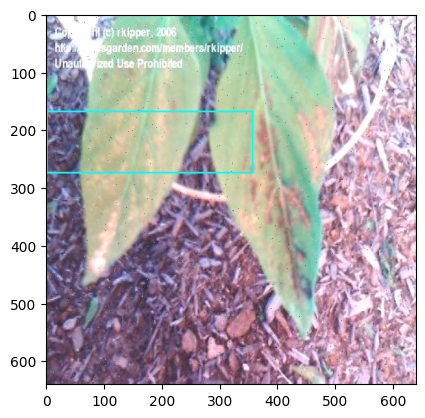

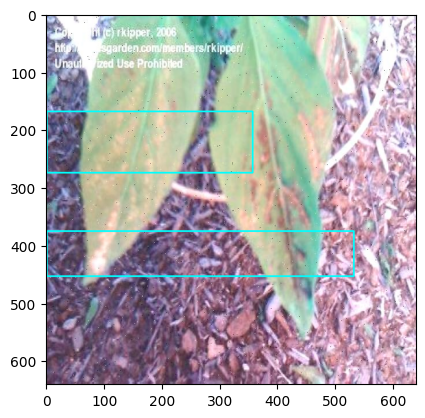

In [22]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(os.path.join('/kaggle/working/fyp-Sugarcane-Plant-Disease-2/train/images', img_path))

dh , dw , _ = img.shape

f1 = open( os.path.join('/kaggle/working/fyp-Sugarcane-Plant-Disease-2/train/labels', label_path) , 'r')
data = f1.readlines()
f1.close()
print(data)
for dt in data:
    _ , x , y , w , h = map(float , dt.split(' '))
    
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1 
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1
    
    cv2.rectangle(img , (1 , t) , (r , b) , (0 , 255 , 255) , 2)
    plt.imshow(img)
    plt.show()


In [23]:
import shutil
import os

train_images_path = '/kaggle/working/fyp-Sugarcane-Plant-Disease-2/train/images'
train_labels_path = '/kaggle/working/fyp-Sugarcane-Plant-Disease-2/train/labels'

val_images_path   = '/kaggle/working/fyp-Sugarcane-Plant-Disease-2/valid/images'
val_labels_path   = '/kaggle/working/fyp-Sugarcane-Plant-Disease-2/valid/labels'

test_images_path  = '/kaggle/working/fyp-Sugarcane-Plant-Disease-2/test/images'
test_labels_path  = '/kaggle/working/fyp-Sugarcane-Plant-Disease-2/test/labels'

In [24]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 kB 20.7 MB/s eta 0:00:0000:01


In [25]:
from ultralytics import YOLO
from IPython.display import display, Image

In [26]:
model = YOLO('yolov8l.pt', verbose=True)

100%|██████████| 83.7M/83.7M [00:00<00:00, 311MB/s]


In [27]:
model.train(
    data = '/kaggle/working/fyp-Sugarcane-Plant-Disease-2/data.yaml' ,
    epochs = 40,
    imgsz=640
)

Ultralytics YOLOv8.2.10 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/kaggle/working/fyp-Sugarcane-Plant-Disease-2/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

100%|██████████| 755k/755k [00:00<00:00, 42.1MB/s]
2024-05-08 05:26:00,915	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-08 05:26:02,668	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-08 05:26:04.992678: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 05:26:04.992796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 05:26:05.124442: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=36

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 171MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/fyp-Sugarcane-Plant-Disease-2/train/labels... 8986 images, 27 backgrounds, 0 corrupt: 100%|██████████| 8986/8986 [00:07<00:00, 1215.53it/s]


train: New cache created: /kaggle/working/fyp-Sugarcane-Plant-Disease-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/fyp-Sugarcane-Plant-Disease-2/valid/labels... 991 images, 4 backgrounds, 0 corrupt: 100%|██████████| 991/991 [00:00<00:00, 1369.58it/s]


val: New cache created: /kaggle/working/fyp-Sugarcane-Plant-Disease-2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40        11G      1.406      2.986       1.64         66        640: 100%|██████████| 562/562 [08:44<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:22<00:00,  1.40it/s]

                   all        991       2669      0.359      0.301      0.228      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40        11G      1.388      2.305      1.595         31        640: 100%|██████████| 562/562 [08:37<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.49it/s]

                   all        991       2669      0.287      0.286      0.215      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      10.9G      1.392      2.195      1.602         39        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.337      0.309      0.261      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      10.9G      1.369      2.062       1.58         57        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.389      0.361      0.324      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      10.7G      1.321      1.878      1.553         31        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.49it/s]

                   all        991       2669      0.405      0.395      0.346      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      10.9G      1.292      1.775      1.526         38        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669       0.42      0.419      0.363      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      10.7G      1.254      1.647      1.497         37        640: 100%|██████████| 562/562 [08:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.441       0.42      0.395      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      10.9G      1.232      1.593      1.485         47        640: 100%|██████████| 562/562 [08:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.416      0.477      0.399      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      10.7G      1.209      1.499      1.473         37        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.482      0.469      0.437      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      10.9G       1.19      1.426      1.454         51        640: 100%|██████████| 562/562 [08:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.466      0.458      0.429      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      10.7G       1.16      1.355      1.436         44        640: 100%|██████████| 562/562 [08:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.448      0.468      0.429      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      10.9G       1.13      1.292      1.411         71        640: 100%|██████████| 562/562 [08:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.464      0.463      0.436      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      10.7G      1.116      1.254      1.406         72        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.504      0.476      0.464      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      10.9G      1.105      1.197      1.395         46        640: 100%|██████████| 562/562 [08:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.483      0.476      0.457      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      10.7G       1.07      1.156      1.385         77        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.506      0.472      0.456      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      10.9G      1.049      1.098      1.356         50        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669       0.52      0.455      0.456       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      10.7G       1.04      1.058       1.35         60        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.514      0.478      0.467      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      10.9G      1.019      1.018      1.338         56        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.537      0.465      0.466      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      10.7G      0.987     0.9786      1.314         52        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.508      0.482      0.457       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      10.9G     0.9698     0.9287      1.303         62        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.514      0.486       0.47      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      10.7G     0.9536     0.9015      1.287         75        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.50it/s]

                   all        991       2669      0.509      0.477      0.461      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      10.9G     0.9361     0.8751      1.283         47        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.554      0.459      0.467      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      10.7G     0.9042     0.8376      1.259         59        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.504      0.472      0.451      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      10.9G     0.8912      0.805      1.246         46        640: 100%|██████████| 562/562 [08:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.517      0.463      0.452      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      10.7G      0.873     0.7837      1.234         39        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.497      0.471      0.448      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      10.9G     0.8449     0.7505      1.214         35        640: 100%|██████████| 562/562 [08:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.512      0.483      0.452      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      10.7G     0.8361     0.7361      1.211         32        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.504      0.481      0.457      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      10.9G     0.8155     0.7076      1.199         36        640: 100%|██████████| 562/562 [08:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.509      0.469      0.454       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      10.7G     0.7964     0.6859      1.182         59        640: 100%|██████████| 562/562 [08:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669       0.58       0.44      0.461      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      10.9G     0.7774     0.6592      1.171         41        640: 100%|██████████| 562/562 [08:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.532      0.451      0.447      0.283


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      10.7G     0.6958     0.5067      1.127         41        640: 100%|██████████| 562/562 [08:36<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.515      0.453      0.461      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      10.9G     0.6668     0.4685      1.104         25        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.541      0.455      0.451      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      10.7G     0.6388     0.4418      1.086         33        640: 100%|██████████| 562/562 [08:35<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.532      0.459      0.446      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      10.9G     0.6172     0.4189      1.072         59        640: 100%|██████████| 562/562 [08:35<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.547      0.477      0.458      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      10.7G     0.5966     0.3998      1.054         13        640: 100%|██████████| 562/562 [08:35<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.518      0.456      0.447       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      10.9G     0.5735     0.3771      1.039         16        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.539      0.462      0.454      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      10.7G     0.5611     0.3648      1.033         36        640: 100%|██████████| 562/562 [08:35<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.52it/s]

                   all        991       2669      0.542       0.46      0.454      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      10.9G     0.5407     0.3496      1.022         33        640: 100%|██████████| 562/562 [08:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.52it/s]

                   all        991       2669       0.53      0.456       0.45      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      10.7G     0.5221     0.3319      1.005         29        640: 100%|██████████| 562/562 [08:35<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.517      0.474       0.45       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      10.9G     0.5089     0.3253     0.9964         26        640: 100%|██████████| 562/562 [08:35<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:20<00:00,  1.51it/s]

                   all        991       2669      0.539      0.455      0.448       0.29



40 epochs completed in 5.976 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.10 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 43634364 parameters, 0 gradients, 165.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.32it/s]


                   all        991       2669      0.519      0.483       0.47      0.301
       Apple Scab Leaf        991         29      0.416      0.448      0.383      0.269
            Apple leaf        991         55      0.591      0.577       0.64      0.446
       Apple rust leaf        991         48      0.558      0.646      0.694      0.411
      Bell_pepper leaf        991         59      0.352      0.644      0.421       0.29
 Bell_pepper leaf spot        991         77      0.343      0.195      0.227      0.153
        Blueberry leaf        991        211      0.558      0.645      0.621      0.376
           Cherry leaf        991         62      0.595      0.339      0.395      0.258
   Corn Gray leaf spot        991        127      0.492      0.442      0.394       0.28
      Corn leaf blight        991         95      0.547      0.674      0.519      0.323
        Corn rust leaf        991        102      0.735      0.618      0.687      0.511
            Peach lea

lr/pg0,▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▁▂▄▅▅▆▆▇▇▇▇██████████▇█▇████▇█▇▇█▇██▇▇█
metrics/mAP50-95(B),▂▁▂▄▄▅▆▆▇▇▇▇██████████▇▇▇▇███▇█▇▇███████
metrics/precision(B),▃▁▂▃▄▄▅▄▆▅▅▅▆▆▆▇▆▇▆▆▆▇▆▆▆▆▆▆█▇▆▇▇▇▇▇▇▇▆▇
metrics/recall(B),▂▁▂▄▅▆▆█▇▇▇▇██▇▇█▇███▇▇▇▇██▇▆▇▇▇▇█▇▇▇▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,████▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ada1673feb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0

In [28]:
os.listdir('runs/detect/train/weights')

['last.pt', 'best.pt']

In [29]:
names = ['best.pt', 'last.pt']

for fileName in names:
    outer_path = os.path.join('/kaggle/working/runs/detect/train/weights', fileName)
    destination_path = os.path.join('/kaggle/working', fileName)
    shutil.copy(outer_path, destination_path)

In [30]:
model = YOLO('/kaggle/working/best.pt')


image 1/1 /kaggle/working/fyp-Sugarcane-Plant-Disease-2/test/images/P6120019_jpg.rf.c0a2c00f436264c27d30f479722eaca4.jpg: 640x640 1 Corn leaf blight, 26.7ms
Speed: 1.6ms preprocess, 26.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


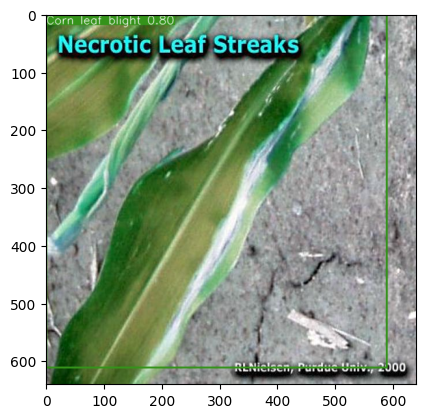


image 1/1 /kaggle/working/fyp-Sugarcane-Plant-Disease-2/test/images/Early-blight-660x440_jpg.rf.7513e64a0dcd48631f608c69a1451840.jpg: 640x640 3 Tomato Early blight leafs, 2 Tomato leaf bacterial spots, 26.1ms
Speed: 2.1ms preprocess, 26.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


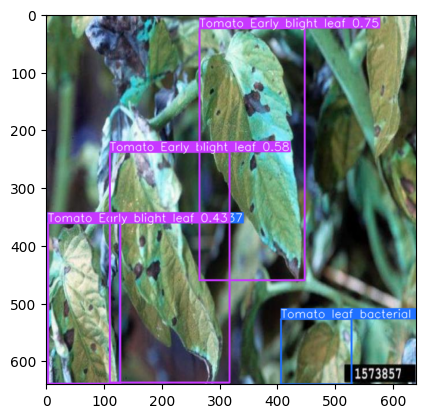


image 1/1 /kaggle/working/fyp-Sugarcane-Plant-Disease-2/test/images/20190131_153719-0-_jpg.rf.6e28d373959848e9535bde54243c104a.jpg: 640x640 1 healthy, 26.1ms
Speed: 1.6ms preprocess, 26.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


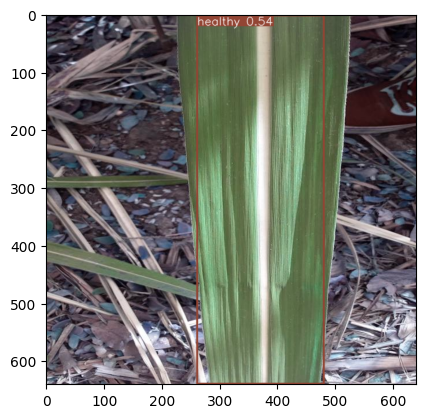


image 1/1 /kaggle/working/fyp-Sugarcane-Plant-Disease-2/test/images/clsp47_jpg.rf.f17dc9a4dfa8e22b9b7833b31b069a06.jpg: 640x640 4 cercosporas, 26.1ms
Speed: 1.6ms preprocess, 26.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


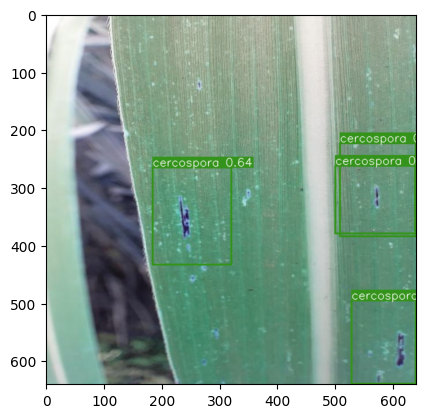


image 1/1 /kaggle/working/fyp-Sugarcane-Plant-Disease-2/test/images/corn-stalk-rot-leaf-symptoms-F1_jpg_jpeg_jpg.rf.add093156ae077904e8958829a20a17d.jpg: 640x640 4 Corn leaf blights, 26.2ms
Speed: 1.8ms preprocess, 26.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


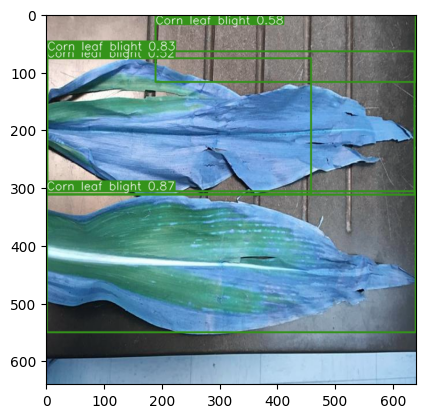


image 1/1 /kaggle/working/fyp-Sugarcane-Plant-Disease-2/test/images/img_8042_jpg.rf.d213ccbb6c9bfa041f914efa66d62265.jpg: 640x640 3 Blueberry leafs, 1 Cherry leaf, 1 Peach leaf, 26.2ms
Speed: 1.6ms preprocess, 26.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


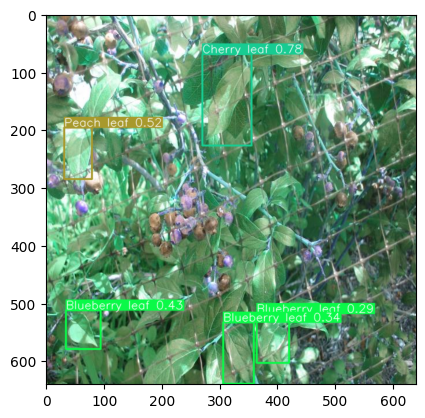

In [31]:
import cv2
files_name = os.listdir('/kaggle/working/fyp-Sugarcane-Plant-Disease-2/test/images')[9:15]
for i in files_name:
    img_path = os.path.join('/kaggle/working/fyp-Sugarcane-Plant-Disease-2/test/images', i)
    img = cv2.imread(img_path)
    prediction = model(img_path)
    plt.imshow(prediction[0].plot())
    plt.show()

In [ ]:
#prediction = model(img_path)
#model.export(format="onnx")

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------